## Seedling Resnet101

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn import metrics

In [5]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn import metrics

In [6]:
path = 'data/seedling/'

In [7]:
ls {path}

labels.csv  models/  sample_submission.csv  test/  tmp/  train/


## Train the Model

In [10]:
arch = resnet101
sz = 299
bs = 32

In [11]:
!ls {path}

labels.csv  models  sample_submission.csv  test  tmp  train


In [12]:
labels_csv = f'{path}labels.csv'
n = len(list(open(labels_csv)))-1
val_idxs = get_cv_idxs(n)

In [14]:
ls {path}test -1 | wc

    794     794   20648


In [15]:
ls {path}train -1 | wc

   4750    4750  123504


In [16]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

In [17]:
data = ImageClassifierData.from_csv(path, 'train', labels_csv, test_name='test', val_idxs=val_idxs, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|███████▉  | 95/119 [00:02<00:00, 37.07it/s, loss=9.6] 


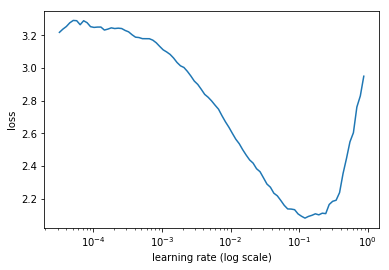

In [18]:
lrf=learn.lr_find()
learn.sched.plot()

In [19]:
lr = 0.05

In [20]:
learn.fit(lr, n_cycle=3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       1.12386  0.48976  0.83608]                       
[ 1.       0.84307  0.43074  0.84867]                        
[ 2.       0.67784  0.40508  0.85492]                        



In [21]:
learn.unfreeze()

In [22]:
learn.fit(lr, n_cycle=3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.75285  0.4202   0.86013]                        
[ 1.       0.56034  0.3455   0.87784]                        
[ 2.       0.66617  0.37815  0.86695]                        
[ 3.       0.55714  0.30782  0.88466]                        
[ 4.       0.45466  0.27408  0.89186]                        
[ 5.       0.42616  0.28182  0.89394]                        
[ 6.       0.47944  0.36697  0.86686]                        
[ 7.       0.50332  0.32889  0.88722]                        
[ 8.       0.4489   0.27853  0.90066]                        
[ 9.       0.41703  0.27678  0.90019]                        
[ 10.        0.37512   0.26974   0.9018 ]                    
[ 11.        0.35291   0.24154   0.90852]                    
[ 12.        0.33829   0.2481    0.91269]                    
[ 13.        0.35642   0.24347   0.90956]                    



In [23]:
learn.save('12_28_seed_101_first')

In [24]:
lrs=np.array([lr/18,lr/6,lr/2])

In [25]:
learn.fit(lrs, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.34548  0.23796  0.90748]                        
[ 1.       0.33895  0.24636  0.90597]                        
[ 2.       0.33334  0.23349  0.91165]                        
[ 3.       0.35237  0.25637  0.90436]                        
[ 4.       0.35171  0.21381  0.91989]                        
[ 5.       0.33399  0.22438  0.91941]                        
[ 6.       0.31566  0.21578  0.91676]                        



In [26]:
learn.save('12_28_seed_101_second')

In [33]:
log_preds, y = learn.TTA()

In [34]:
preds = np.mean(np.exp(log_preds), 0)

In [35]:
metrics.log_loss(y,preds), accuracy(preds,y)

(0.181252561209335, 0.93999999999999995)

In [51]:
log_preds_test = learn.predict(is_test = True)

In [52]:
len(log_preds_test)

793

In [53]:
log_preds_test.shape

(793, 12)

In [54]:
log_preds_test

array([[ -8.10673, -10.60066,  -4.80128, ...,  -7.3429 ,  -9.43554,  -7.56336],
       [ -0.17175, -13.01608, -11.31871, ..., -15.2706 , -13.54993, -12.41161],
       [-13.49863, -14.02005,  -5.84048, ...,  -7.41518, -15.66858,  -8.30445],
       ..., 
       [-20.09703, -12.04412, -13.6878 , ..., -16.27986, -17.9044 ,  -9.65622],
       [ -2.84554, -10.31985,  -7.73953, ...,  -9.7325 , -11.4888 , -10.2055 ],
       [ -8.2868 ,  -8.48605,  -5.69129, ...,  -6.52806, -10.83819,  -8.59062]], dtype=float32)

In [55]:
len(np.unique(os.listdir(f'{path}test')))

794